### Importing.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
# import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Nicolas\Documents\YCBS 253\assignment04.csv.txt', 
                 encoding='utf_16', sep='\t')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


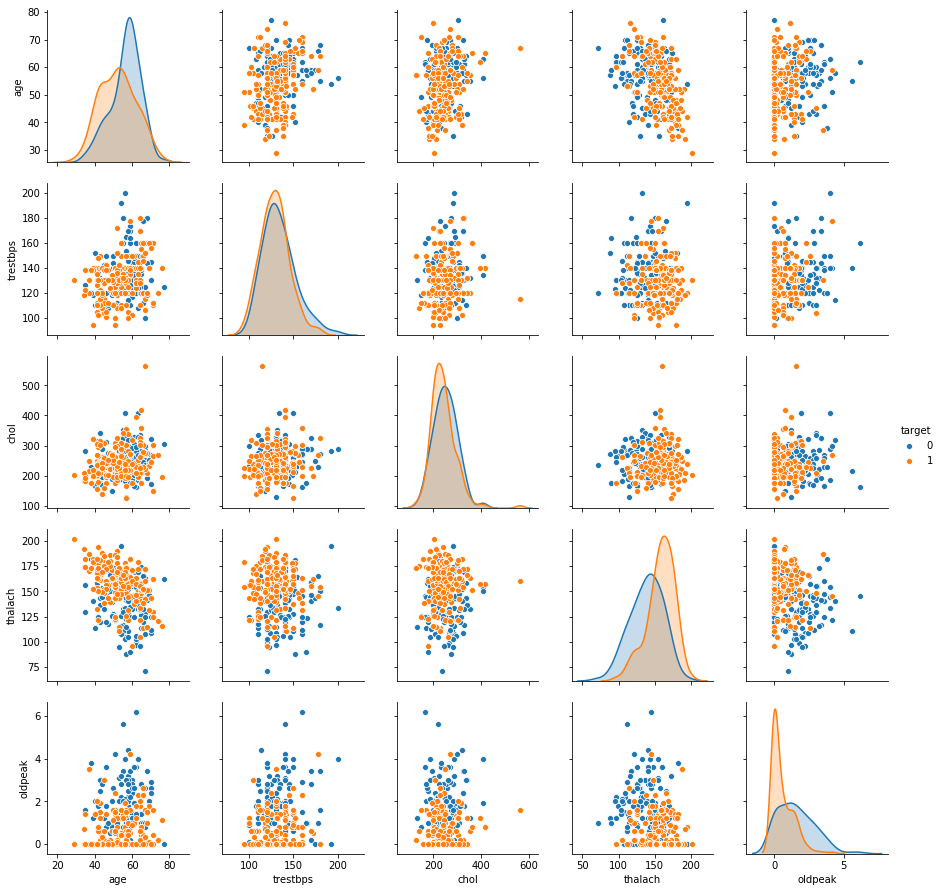

In [4]:
sns.pairplot(df, vars=tuple(["age", "trestbps", 'chol', 'thalach', 'oldpeak']), 
             hue='target')

Except for `oldpeak`, we can see that it will be difficult to distinguish between heart disease or not. The distributions are very much alike.

### Preprocessing.

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.target.sum()/len(df)

0.5445544554455446

Target isn't 50% of each, that's important to consider. It can be split equally by uncommenting the next cell.

In [7]:
# df.target.value_counts()
# df_hd = df.loc[df.target == 1]
# df_no_hd = df.loc[df.target == 0]
# df_hd = df_hd.sample(n=138, random_state=42)
# df = pd.concat([df_hd, df_no_hd], axis=0, sort=False).sample(frac=1, 
random_state=42).reset_index().drop('index', axis=1)
# len(df)
# df.target.value_counts()
# the df is now equally split between heart disease / not

One hot encoding.

In [8]:
df.sex = df.sex.astype(str).str.replace('1', 'male').str.replace('0', 
                                                                 'female')
sex = pd.get_dummies(df.sex, prefix_sep=': ', prefix='sex')
df = pd.concat([df, sex], sort=False, axis=1).drop('sex', axis=1)

In [9]:
df.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex: female', 'sex: male'],
      dtype='object')

In [10]:
df.cp = df.cp.astype(str).str.replace('0', 
                                'typical angina').str.replace('1', 'atypical angina')
df.cp = df.cp.astype(str).str.replace('2', 
                                'non-anginal pain').str.replace('3', 'asymptomatic')
cp = pd.get_dummies(df.cp, prefix_sep=': ', prefix='cp')
df = pd.concat([df, cp], sort=False, axis=1).drop('cp', axis=1)

In [11]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex: female', 'sex: male',
       'cp: asymptomatic', 'cp: atypical angina', 'cp: non-anginal pain',
       'cp: typical angina'],
      dtype='object')

In [12]:
df.fbs = df.fbs.astype(str).str.replace('0', 'false').str.replace('1', 'true')
fbs = pd.get_dummies(df.fbs, prefix_sep=': ', prefix='fbs')
df = pd.concat([df, fbs], sort=False, axis=1).drop('fbs', axis=1)

In [13]:
df.columns

Index(['age', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'sex: female', 'sex: male',
       'cp: asymptomatic', 'cp: atypical angina', 'cp: non-anginal pain',
       'cp: typical angina', 'fbs: false', 'fbs: true'],
      dtype='object')

In [14]:
df.restecg = df.restecg.astype(str).str.replace('0', 
            'normal').str.replace('1', 'abnormality').str.replace('2', 'hypertrophy')
restecg = pd.get_dummies(df.restecg, prefix_sep=': ', prefix='restecg')
df = pd.concat([df, restecg], sort=False, axis=1).drop('restecg', axis=1)

In [15]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target', 'sex: female', 'sex: male', 'cp: asymptomatic',
       'cp: atypical angina', 'cp: non-anginal pain', 'cp: typical angina',
       'fbs: false', 'fbs: true', 'restecg: abnormality',
       'restecg: hypertrophy', 'restecg: normal'],
      dtype='object')

In [16]:
df.exang = df.exang.astype(str).str.replace('1', 'yes').str.replace('0', 'no')
exang = pd.get_dummies(df.exang, prefix_sep=': ', prefix='exang')
df = pd.concat([df, exang], sort=False, axis=1).drop('exang', axis=1)

In [17]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'sex: female', 'sex: male', 'cp: asymptomatic',
       'cp: atypical angina', 'cp: non-anginal pain', 'cp: typical angina',
       'fbs: false', 'fbs: true', 'restecg: abnormality',
       'restecg: hypertrophy', 'restecg: normal', 'exang: no', 'exang: yes'],
      dtype='object')

In [18]:
df.slope = df.slope.astype(str).str.replace('0', 
            'downsloping').str.replace('1', 'upsloping').str.replace('2', 'flat')
slope = pd.get_dummies(df.slope, prefix_sep=': ', prefix='slope')
df = pd.concat([df, slope], sort=False, axis=1).drop('slope', axis=1)

In [19]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'target',
       'sex: female', 'sex: male', 'cp: asymptomatic', 'cp: atypical angina',
       'cp: non-anginal pain', 'cp: typical angina', 'fbs: false', 'fbs: true',
       'restecg: abnormality', 'restecg: hypertrophy', 'restecg: normal',
       'exang: no', 'exang: yes', 'slope: downsloping', 'slope: flat',
       'slope: upsloping'],
      dtype='object')

In [20]:
df.thal = df.thal.astype(str).str.replace('1', 
            'normal').str.replace('2', 'fixed defect').str.replace('3', 
                                                    'reversible defect')
thal = pd.get_dummies(df.thal, prefix_sep=': ', prefix='thal')
df = pd.concat([df, thal], sort=False, axis=1).drop('thal', axis=1)

In [21]:
df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 
           'oldpeak']] = normalize(df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 
                                 'oldpeak']], copy=False, axis=1)

In [22]:
df.head()

age  trestbps      chol   thalach   oldpeak  ca  target  sex: female  \
0  0.197466  0.454485  0.730310  0.470156  0.007209   0       1            0   
1  0.108753  0.382105  0.734817  0.549643  0.010287   0       1            0   
2  0.136832  0.433857  0.680821  0.574026  0.004672   0       1            1   
3  0.172888  0.370475  0.728601  0.549538  0.002470   0       1            0   
4  0.138435  0.291442  0.859754  0.395876  0.001457   0       1            1   

   sex: male  cp: asymptomatic           ...             restecg: hypertrophy  \
0          1                 1           ...                                0   
1          1                 0           ...                                0   
2          0                 0           ...                                0   
3          1                 0           ...                                0   
4          0                 0           ...                                0   

   restecg: normal  exang: no  exang: yes  slope: downsloping  slope: flat  \
0                1          1           0                   1            0   
1                0          1           0                   1            0   
2                1          1           0                   0            1   
3                0          1           0                   0            1   
4                0          0           1                   0            1   

   slope: upsloping  thal: fixed defect  thal: normal  thal: reversible defect  
0                 0                   0             1                        0  
1                 0                   1             0                        0  
2                 0                   1             0                        0  
3                 0                   1             0                        0  
4                 0                   1             0                        0  

[5 rows x 26 columns]

Ready to be analyzed.

In [23]:
df.shape

(303, 26)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target)

### Analysis.

##### Logistic regression.

In [25]:
np.abs(df.corr()['target']).sort_values(ascending=False).head(15)

target                     1.000000
thal: fixed defect         0.527334
cp: typical angina         0.516015
thal: reversible defect    0.486112
exang: yes                 0.436757
exang: no                  0.436757
oldpeak                    0.426154
slope: flat                0.394066
ca                         0.391724
thalach                    0.378847
slope: upsloping           0.362053
cp: non-anginal pain       0.316742
sex: male                  0.280937
sex: female                0.280937
cp: atypical angina        0.245879
Name: target, dtype: float64

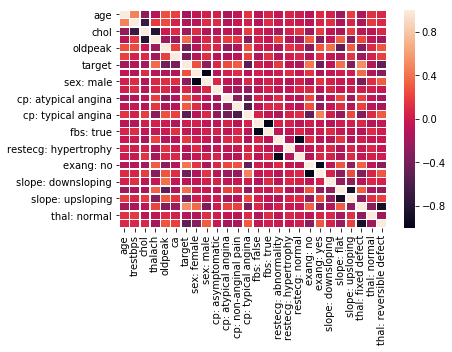

In [26]:
sns.heatmap(df.corr(), linewidth=0.5)

In [30]:
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.8289473684210527

82.9% accuracy is okay, but what we want to know is if we can predict nearly all heart disease, even if we detect it in some people who don't have it. The important is to identify the true positives, and the false negatives. What we want to look at is recall.

In [33]:
recall_score(y_test, y_pred)

0.8292682926829268

In [34]:
confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 7, 34]], dtype=int64)

 Let's look at the predictors, for fun.

In [35]:
coefficients = pd.DataFrame(log.coef_, columns=[df.drop('target', 
                                            axis=1).columns]).transpose()
coefficients.columns = ['Coefficient']

In [36]:
coefficients.sort_values(by='Coefficient')

Coefficient
cp: typical angina         -1.006029
ca                         -0.903816
thal: reversible defect    -0.805754
exang: yes                 -0.573935
slope: upsloping           -0.482053
sex: male                  -0.476472
slope: downsloping         -0.351700
restecg: hypertrophy       -0.325710
chol                       -0.226411
restecg: normal            -0.221946
cp: atypical angina        -0.187594
trestbps                   -0.132788
fbs: false                 -0.087877
oldpeak                    -0.033118
age                         0.007334
thal: normal                0.075925
fbs: true                   0.087883
cp: asymptomatic            0.442456
thalach                     0.457448
sex: female                 0.476477
restecg: abnormality        0.547662
exang: no                   0.573941
thal: fixed defect          0.729835
cp: non-anginal pain        0.751172
slope: flat                 0.833759

Let's try various values of c.

In [37]:
recall = []
for i in np.linspace(0.01, 1, 30):
    log = LogisticRegression(solver='lbfgs', C=i)
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    recall.append(recall_score(y_test, y_pred))

In [38]:
c_recall = pd.Series(recall, index=np.linspace(0.01, 1, 30))
c_recall

0.010000    0.926829
0.044138    0.878049
0.078276    0.853659
0.112414    0.853659
0.146552    0.829268
0.180690    0.829268
0.214828    0.804878
0.248966    0.804878
0.283103    0.804878
0.317241    0.804878
0.351379    0.804878
0.385517    0.804878
0.419655    0.804878
0.453793    0.804878
0.487931    0.804878
0.522069    0.804878
0.556207    0.804878
0.590345    0.804878
0.624483    0.804878
0.658621    0.804878
0.692759    0.804878
0.726897    0.804878
0.761034    0.804878
0.795172    0.829268
0.829310    0.829268
0.863448    0.829268
0.897586    0.829268
0.931724    0.829268
0.965862    0.829268
1.000000    0.829268
dtype: float64

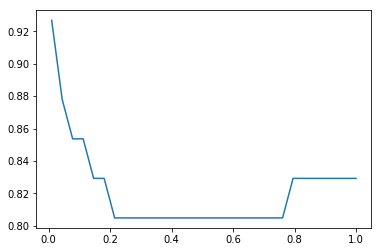

In [39]:
c_recall.plot()

In [40]:
log = LogisticRegression(solver='lbfgs', C=0.01, max_iter=10_000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28,  7],
       [ 3, 38]], dtype=int64)

Better!

In [41]:
accuracy_score(y_test, y_pred)

0.868421052631579

In [42]:
recall_score(y_test, y_pred)

0.926829268292683

We achieve a recall score of 92.6% with logistic regression.

##### With polynomial features.

In [43]:
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [44]:
X_test_poly.shape

(76, 142506)

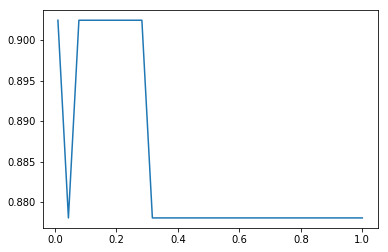

In [45]:
recall = []
for i in np.linspace(0.01, 1, 10):
    log = LogisticRegression(solver='lbfgs', C=i, max_iter=1_000)
    log.fit(X_train_poly, y_train)
    y_pred = log.predict(X_test_poly)
    recall.append(recall_score(y_test, y_pred))
c_recall = pd.Series(recall, index=np.linspace(0.01, 1, 10))
c_recall.plot()

In [46]:
c_recall

0.010000    0.902439
0.044138    0.878049
0.078276    0.902439
0.112414    0.902439
0.146552    0.902439
0.180690    0.902439
0.214828    0.902439
0.248966    0.902439
0.283103    0.902439
0.317241    0.878049
0.351379    0.878049
0.385517    0.878049
0.419655    0.878049
0.453793    0.878049
0.487931    0.878049
0.522069    0.878049
0.556207    0.878049
0.590345    0.878049
0.624483    0.878049
0.658621    0.878049
0.692759    0.878049
0.726897    0.878049
0.761034    0.878049
0.795172    0.878049
0.829310    0.878049
0.863448    0.878049
0.897586    0.878049
0.931724    0.878049
0.965862    0.878049
1.000000    0.878049
dtype: float64

In [47]:
recall_score(y_test, y_pred)

0.8780487804878049

Not a success.

##### Logistic Regression using Tensorflow

In [48]:
'''x = np.array(df.drop('target', axis=1))
y = np.array(pd.get_dummies(df.target, prefix_sep=': ', prefix='target'))
x.shape'''

"x = np.array(df.drop('target', axis=1))\ny = np.array(pd.get_dummies(df.target, prefix_sep=': ', prefix='target'))\nx.shape"

In [49]:
'''alpha, epochs = 0.0035, 800
m, n = x.shape '''

'alpha, epochs = 0.0035, 800\nm, n = x.shape '

In [50]:
'''X = tf.placeholder(tf.float32, [None, n]) 
Y = tf.placeholder(tf.float32, [None, 2]) 
W = tf.Variable(tf.zeros([n, 2])) 
b = tf.Variable(tf.zeros([2]))'''

'X = tf.placeholder(tf.float32, [None, n]) \nY = tf.placeholder(tf.float32, [None, 2]) \nW = tf.Variable(tf.zeros([n, 2])) \nb = tf.Variable(tf.zeros([2]))'

In [51]:
'''Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost) 
init = tf.global_variables_initializer() '''

'Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) \ncost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y) \noptimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost) \ninit = tf.global_variables_initializer() '

In [52]:
'''with tf.Session() as sess: 
    sess.run(init) 
    cost_history, accuracy_history = [], [] 
    for epoch in range(epochs): 
        cost_per_epoch = 0
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
    Weight = sess.run(W) 
    Bias = sess.run(b)   
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%")'''

'with tf.Session() as sess: \n    sess.run(init) \n    cost_history, accuracy_history = [], [] \n    for epoch in range(epochs): \n        cost_per_epoch = 0\n        sess.run(optimizer, feed_dict = {X : x, Y : y}) \n        c = sess.run(cost, feed_dict = {X : x, Y : y}) \n        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), \n                                          tf.argmax(Y, 1)) \n        accuracy = tf.reduce_mean(tf.cast(correct_prediction, \n                                                 tf.float32)) \n        cost_history.append(sum(sum(c))) \n        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) \n        if epoch % 100 == 0 and epoch != 0: \n            print("Epoch " + str(epoch) + " Cost: "\n                            + str(cost_history[-1])) \n    Weight = sess.run(W) \n    Bias = sess.run(b)   \n    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), \n                                      tf.argmax(Y, 1)) \n    accuracy = tf.reduce_mean(tf.cast(co

In [53]:
# Epoch 100 Cost: 357.7281494140625
# Epoch 200 Cost: 353.6000061035156
# Epoch 300 Cost: 351.7819061279297
# Epoch 400 Cost: 350.64959716796875
# Epoch 500 Cost: 349.83567810058594
# Epoch 600 Cost: 349.2054138183594
# Epoch 700 Cost: 348.69398498535156

# Accuracy: 85.80858111381531 %

We gained a little bit of accuracy, but I honestly don't know enough about Tensorflow yet to print coefficients/weights, or to get the recall score. 

##### Using SVM

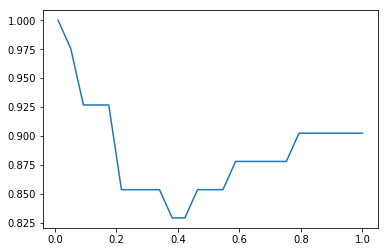

In [54]:
recall = []
for i in np.linspace(0.01, 1, 25):
    clf = SVC(C=i, gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall.append(recall_score(y_test, y_pred))
c_recall = pd.Series(recall, index=np.linspace(0.01, 1, 25))
c_recall.plot()

In [55]:
clf = SVC(C=.1, gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[28,  7],
       [ 3, 38]], dtype=int64)

This doesn't improve.

##### Presenting the findings. 

The goal was that the doctor could do it himself, so here's a simple function.

In [58]:
log = LogisticRegression(solver='lbfgs', C=0.01, max_iter=10_000)
log.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
def diagnostic_bot():
    info = []
    for col in df.drop('target', axis=1).columns:
        print('Enter the [' + col + '] of the patient (y=1, n=0): ')
        info.append(input())
    print('There is a', str(np.round(log.predict_proba(np.array(info, 
                                                    dtype=int).reshape(1, -1))*100)), 
          '% chance that the patient has heart disease')

In [60]:
diagnostic_bot()

Enter the [age] of the patient (y=1, n=0): 
1
Enter the [trestbps] of the patient (y=1, n=0): 
1
Enter the [chol] of the patient (y=1, n=0): 
1
Enter the [thalach] of the patient (y=1, n=0): 
1
Enter the [oldpeak] of the patient (y=1, n=0): 
1
Enter the [ca] of the patient (y=1, n=0): 
1
Enter the [sex: female] of the patient (y=1, n=0): 
1
Enter the [sex: male] of the patient (y=1, n=0): 
1
Enter the [cp: asymptomatic] of the patient (y=1, n=0): 
1
Enter the [cp: atypical angina] of the patient (y=1, n=0): 
1
Enter the [cp: non-anginal pain] of the patient (y=1, n=0): 
1
Enter the [cp: typical angina] of the patient (y=1, n=0): 
1
Enter the [fbs: false] of the patient (y=1, n=0): 
1
Enter the [fbs: true] of the patient (y=1, n=0): 
1
Enter the [restecg: abnormality] of the patient (y=1, n=0): 
1
Enter the [restecg: hypertrophy] of the patient (y=1, n=0): 
1
Enter the [restecg: normal] of the patient (y=1, n=0): 
1
Enter the [exang: no] of the patient (y=1, n=0): 
1
Enter the [exang: y

Using this tool, a doctor has 92.9% chance of identifying patients with heart disease.